In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Read Data

In [28]:
places = pd.read_csv('Places Dataset.xlsx - places_final_dataset.csv')
users = pd.read_csv('Visitors Preference Dataset.xlsx - user_data_version_3_10K_Users.csv')

## Check data samples

In [29]:
places.head()

,name,lat,lng,formatted_address,rating,user_ratings_total,latest_reviews
0,Arugam Bay Beach,6.840408,81.836848,"Arugam Bay Beach, Sri Lanka",4.8,1591.0,['Arugam Bay Beach is a surfer's paradise! I s...
1,Mirissa Beach,5.944703,80.459161,"Mirissa, Sri Lanka",4.6,1748.0,['Mirissa Beach is truly a gem on Sri LankaÃ¢Â...
2,Weligama Beach (surf and stay),5.972486,80.435714,"Weligama, Sri Lanka",4.4,325.0,['Weligama Beach is a fantastic spot for both ...
3,Ahangama,5.973975,80.362159,"Ahangama, Sri Lanka",NaN,NaN,['Ahangama was a bit disappointing for me as a...
4,Hikkaduwa Beach,6.137727,80.099060,"Hikkaduwa Beach, Sri Lanka",4.7,1438.0,['Hikkaduwa Beach is a delightful escape for s...


* Data set includes Nan values for ratings. So we need to add ratings using LLM model that would be better

In [30]:
users.head()

,User ID,Name,Email,Preferred Activities,Bucket list destinations Sri Lanka
0,1,Jennifer Quinn,jennifer.quinn@example.com,"['cycling', 'historical monuments', 'village h...","['Polonnaruwa', 'Hatton', 'Anuradhapura', 'Ell..."
1,2,Emily Perry,emily.perry@example.com,"['butterfly watching', 'hot springs', 'wildlif...","['Madunagala Hot Water Spring', 'Wilpattu Nati..."
2,3,Danielle Mcbride,danielle.mcbride@example.com,"['sea cruises', 'themed parks', 'craft worksho...","['Mirissa Beach', 'Negombo Lagoon', 'Batadomba..."
3,4,Angelica Wilson,angelica.wilson@example.com,"['fishing', 'hot springs', 'sailing']","['Maha Oya Hot Water Springs', 'Colombo Port C..."
4,5,Laurie Powers,laurie.powers@example.com,"['history tours', 'sailing', 'literary tours']","['Negombo Lagoon', 'Colombo Port City', 'Galle..."


* Need to check whether the prefferd activities are taken from a dropdown list or simply typed by each one.
* Need to check above thing also for the bucket list
* If they are selected from a drop down, totally fine.
* Otherwise we need to categories activities into several unique activities and places to be match with places in the places table

## Check shapes

In [31]:
print("Shape of places table:",places.shape)
print("Shape of users table:",users.shape)

Shape of places table: (411, 7)
Shape of users table: (10000, 5)


## Columns

In [32]:
print("Description of places table:\n",places.describe())
print("Description of users table:\n",users.describe())

Description of places table:
               lat         lng      rating  user_ratings_total
count  410.000000  410.000000  355.000000          355.000000
mean     7.304668   80.583211    4.459437         1608.639437
std      0.994841    0.518571    0.433211         3607.678752
min      5.941381   79.694183    0.900000           27.000000
25%      6.629356   80.213274    4.300000          147.000000
50%      7.012780   80.536523    4.500000          375.000000
75%      7.947930   80.946773    4.750000         1245.500000
max      9.820859   81.859583    5.000000        26736.000000
Description of users table:
            User ID
count  10000.00000
mean    5000.50000
std     2886.89568
min        1.00000
25%     2500.75000
50%     5000.50000
75%     7500.25000
max    10000.00000


## Info

In [33]:
print("Info of places table:\n",places.info())
print("Info of users table:\n",users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                411 non-null    object 
 1   lat                 410 non-null    float64
 2   lng                 410 non-null    float64
 3   formatted_address   411 non-null    object 
 4   rating              355 non-null    float64
 5   user_ratings_total  355 non-null    float64
 6   latest_reviews      411 non-null    object 
dtypes: float64(4), object(3)
memory usage: 22.6+ KB
Info of places table:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   User ID                             10000 non-null  int64 
 1   Name                                10000 non-null  object
 2   Email 

* Nan in Users = 0
* Nan in Places = lat,lng = 1, rating,user rating total = 56, 

# Data Validation

## Check activities

In [34]:
users['Preferred Activities'].unique()

array(["['cycling', 'historical monuments', 'village homestays']",
       "['butterfly watching', 'hot springs', 'wildlife viewing']",
       "['sea cruises', 'themed parks', 'craft workshops']", ...,
       "['sea cruises', 'zip-lining', 'outdoor adventures']",
       "['cycling', 'amusement parks', 'paddleboarding']",
       "['camping', 'hiking', 'safaris']"], dtype=object)

* *Activities are from a dropdown selection. Great!*

## Check Places

### Remove non-English characters

In [35]:
import re

def clean_text(text):
    # Remove all characters except alphabets, numbers, and punctuation
    #cleaned = re.sub(r'[^\w\s.,!?;:()-]', '', str(text))
    cleaned = re.sub(r'[^A-Za-z\s.,]', '', str(text))
    # Normalize spaces
    cleaned = re.sub(r'\s+', ' ', cleaned)
    cleaned = cleaned.lower()
    return cleaned.strip()

# Apply the cleaning function to the 'name' and 'latest_reviews' columns in the places dataframe
places['name'] = places['name'].apply(clean_text)
places['latest_reviews'] = places['latest_reviews'].apply(clean_text)

# Clean the bucket list destinations in the users dataframe
users['Bucket list destinations Sri Lanka'] = users['Bucket list destinations Sri Lanka'].apply(clean_text)

# Print a sample of the cleaned dataframes to verify
print("Sample of cleaned places dataframe:")
print(places[['name', 'latest_reviews']].head())

print("\nSample of cleaned users dataframe:")
print(users['Bucket list destinations Sri Lanka'].head())

# Export names to a CSV file

# Create a DataFrame with the place names
place_names_df = pd.DataFrame(places[['name', 'latest_reviews']])

# Export the DataFrame to a CSV file
#csv_filename = 'unique_place_names.csv'
#place_names_df.to_csv(csv_filename, index=False)

#print(f"Unique place names have been exported to {csv_filename}")


Sample of cleaned places dataframe:
                           name  \
0              arugam bay beach   
1                 mirissa beach   
2  weligama beach surf and stay   
3                      ahangama   
4               hikkaduwa beach   

                                      latest_reviews  
0  arugam bay beach is a surfers paradise i spent...  
1  mirissa beach is truly a gem on sri lankas sou...  
2  weligama beach is a fantastic spot for both be...  
3  ahangama was a bit disappointing for me as a s...  
4  hikkaduwa beach is a delightful escape for sol...  

Sample of cleaned users dataframe:
0    polonnaruwa, hatton, anuradhapura, ella, haputale
1    madunagala hot water spring, wilpattu national...
2    mirissa beach, negombo lagoon, batadombalena c...
3    maha oya hot water springs, colombo port city,...
4    negombo lagoon, colombo port city, galle dutch...
Name: Bucket list destinations Sri Lanka, dtype: object


### Identifying unmatched places and match them

In [36]:
def extractBucketPlacesList(s):
    s=s.replace('[','')
    s=s.replace(']','')
    s=s.replace('/','')
    s=s.replace('\\','')
    s=s.replace('\'','')
    s=s.replace('\"','')
    s=s.lower()
    ##s=s.replace(' ','')
    
    s=s.split(',')
    for i in range(len(s)):
        s[i]=s[i].strip()
    return s

In [37]:
# Step 1: Clean and prepare the place names from 'places' dataframe
places_set = set(places['name'].str.lower().str.strip())

# Step 2: Clean and prepare the bucket list destinations from 'users' dataframe
bucket_list_set = set()
for i, destinations in enumerate(users['Bucket list destinations Sri Lanka']):
    res = extractBucketPlacesList(destinations)
    bucket_list_set.update(res)
    users.at[i, 'Bucket list destinations Sri Lanka'] = res

# Step 3: Compare the two sets
places_in_both = places_set.intersection(bucket_list_set)
places_only_in_places = places_set - bucket_list_set
places_only_in_bucket_list = bucket_list_set - places_set

# Step 4: Print the results
print("Places that appear in both datasets:")
print(places_in_both)
print(f"\nNumber of places in both datasets: {len(places_in_both)}")

print("\nPlaces that appear only in the 'places' dataframe:")
print(places_only_in_places)
print(f"\nNumber of places only in 'places' dataframe: {len(places_only_in_places)}")

print("\nPlaces that appear only in the users' bucket list:")
print(places_only_in_bucket_list)
print(f"\nNumber of places only in bucket list: {len(places_only_in_bucket_list)}")

print(f"\nTotal unique places in 'places' dataframe: {len(places_set)}")
print(f"Total unique places in users' bucket list: {len(bucket_list_set)}")


Places that appear in both datasets:
{'bambarakanda falls', 'bomburu ella waterfall', 'seetha eliya', 'kalpitiya lagoon', 'devon falls', 'ahungalla', 'jungle beach', 'bambarakiri ella', 'sri pada adams peak', 'royal colombo golf club', 'polonnaruwa ancient city', 'uppuveli beach', 'lionel wendt art centre', 'nallur kandaswamy devasthanam', 'pidurangala rock', 'hakgala botanical garden', 'galle dutch fort', 'nelum pokuna theatre', 'kanneliya national rain forest reserve', 'maha oya hot water springs', 'galle', 'nine arches bridge', 'pearl bay', 'leisure world', 'surathali ella', 'gangaramaya temple', 'pinnawala elephant orphanage', 'hikkaduwa', 'diyaluma falls', 'wasgamuwa national park', 'hikkaduwa beach', 'ruhunu maha kataragama dewalaya', 'bopath falls', 'kumana national park', 'jaya sri maha bodhi', 'colombo', 'kitulgala', 'yapahuwa rock fortress', 'national gallery of art', 'ahangama', 'ambalangoda', 'wilpattu national park', 'national museum galle', 'dambulla', 'trincomalee harbou

In [38]:
# Remove the word 'Sri Lanka' From the formatted address to help to find the matches
# Remove 'Sri Lanka' from the formatted_address column
places['formatted_address'] = places['formatted_address'].str.replace(', Sri Lanka', '', regex=False)
places['formatted_address'] = places['formatted_address'].str.replace('Sri Lanka', '', regex=False)
for i,ele in enumerate(places['formatted_address']):
    places.at[i,'formatted_address'] = ele.lower()

# Strip any leading or trailing whitespace
places['formatted_address'] = places['formatted_address'].str.strip()

print("Updated 'formatted_address' column:")
print(places['formatted_address'].head())
print(f"\nNumber of addresses updated: {sum(places['formatted_address'].str.contains('Sri Lanka') == False)}")


Updated 'formatted_address' column:
0    arugam bay beach
1             mirissa
2            weligama
3            ahangama
4     hikkaduwa beach
Name: formatted_address, dtype: object

Number of addresses updated: 411


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import ast

# Create a new column 'Updated_bucket_list' with empty lists
users['Updated_bucket_list'] = [[] for _ in range(len(users))]

def preprocess(text):
    return text.lower().strip()

# Preprocess place names and formatted addresses
places_list = [preprocess(place) for place in places['name']]
places_addresses = [preprocess(addr) for addr in places['formatted_address']]

# Create TF-IDF vectorizer for names
name_vectorizer = TfidfVectorizer()
places_name_tfidf = name_vectorizer.fit_transform(places_list)

# Create TF-IDF vectorizer for combined name and address
combined_vectorizer = TfidfVectorizer()
#combined_places = [f"{name} {addr}" for name, addr in zip(places_list, places_addresses)]
combined_places = places_addresses
places_combined_tfidf = combined_vectorizer.fit_transform(combined_places)

for i, bucket_list in enumerate(users['Bucket list destinations Sri Lanka']):
    updated_list = []
    bucket_places = bucket_list
    
    for p_preprocessed in bucket_places:
        bucket_name_tfidf = name_vectorizer.transform([p_preprocessed])
        bucket_combined_tfidf = combined_vectorizer.transform([p_preprocessed])
        
        name_similarity_matrix = cosine_similarity(bucket_name_tfidf, places_name_tfidf)
        combined_similarity_matrix = cosine_similarity(bucket_combined_tfidf, places_combined_tfidf)
        
        name_score = name_similarity_matrix[0].max()
        if name_score >0.4:  # High confidence in name match
            best_match_index = name_similarity_matrix[0].argmax()
        else:
            # Use combined name and address for matching
            best_match_index = combined_similarity_matrix[0].argmax()
            name_score = combined_similarity_matrix[0].max()
        
        if name_score >= 0:  # Threshold for accepting a match
            updated_list.append(places['name'].iloc[best_match_index])
        else:
            updated_list.append(p_preprocessed)  # Keep original if no good match found
    #print(str(updated_list))
    users.at[i, "Updated_bucket_list"] = updated_list

# Print some results
print(users[['Bucket list destinations Sri Lanka', 'Updated_bucket_list']].head())


                  Bucket list destinations Sri Lanka  \
0  [polonnaruwa, hatton, anuradhapura, ella, hapu...   
1  [madunagala hot water spring, wilpattu nationa...   
2  [mirissa beach, negombo lagoon, batadombalena ...   
3  [maha oya hot water springs, colombo port city...   
4  [negombo lagoon, colombo port city, galle dutc...   

                                 Updated_bucket_list  
0  [polonnaruwa, arugam bay beach, anuradhapura, ...  
1  [madunagala hot water spring, wilpattu nationa...  
2  [mirissa beach, negombo lagoon, batadombalena,...  
3  [maha oya hot water springs, port city colombo...  
4  [negombo lagoon, port city colombo, galle dutc...  


In [40]:
# Calculate matching statistics
total_places = 0
matched_places = 0

# Identify remaining unmatched places
unmatched_places = set()
for updated_list in users['Updated_bucket_list']:
    for place in updated_list:
        if place not in places['name'].values:
            unmatched_places.add(place)
        else:
            matched_places+=1
        total_places+=1

match_percentage = (matched_places / total_places) * 100 if total_places > 0 else 0

print(f"\nTotal places in bucket lists: {total_places}")
print(f"Matched places: {matched_places}")
print(f"Match percentage: {match_percentage:.2f}%")

print(f"\nNumber of unique unmatched places: {len(unmatched_places)}")
if unmatched_places:
    print("Unmatched places:")
    for place in unmatched_places:
        print(f"- {place}")


Total places in bucket lists: 50395
Matched places: 50395
Match percentage: 100.00%

Number of unique unmatched places: 0


In [41]:
# Display info for updated users dataframe
print("\nUpdated Users DataFrame Info:")
users.info()

# Display info for updated places dataframe
print("\nUpdated Places DataFrame Info:")
places.info()

# Display sample rows from both dataframes
print("\nSample rows from Updated Users DataFrame:")
print(users.head())

print("\nSample rows from Updated Places DataFrame:")
print(places.head())

# Display value counts for 'name' column in places dataframe
print("\nValue counts for 'name' column in Places DataFrame:")
print(places['name'].value_counts().head())



Updated Users DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   User ID                             10000 non-null  int64 
 1   Name                                10000 non-null  object
 2   Email                               10000 non-null  object
 3   Preferred Activities                10000 non-null  object
 4   Bucket list destinations Sri Lanka  10000 non-null  object
 5   Updated_bucket_list                 10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB

Updated Places DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                411 non-null    object 
 1   lat       

Shape of places DataFrame: (411, 7)

Columns in places DataFrame: Index(['name', 'lat', 'lng', 'formatted_address', 'rating',
       'user_ratings_total', 'latest_reviews'],
      dtype='object')

Sample of places DataFrame:
                           name       lat        lng formatted_address  \
0              arugam bay beach  6.840408  81.836848  arugam bay beach   
1                 mirissa beach  5.944703  80.459161           mirissa   
2  weligama beach surf and stay  5.972486  80.435714          weligama   
3                      ahangama  5.973975  80.362159          ahangama   
4               hikkaduwa beach  6.137727  80.099060   hikkaduwa beach   

   rating  user_ratings_total  \
0     4.8              1591.0   
1     4.6              1748.0   
2     4.4               325.0   
3     NaN                 NaN   
4     4.7              1438.0   

                                      latest_reviews  
0  arugam bay beach is a surfers paradise i spent...  
1  mirissa beach is t

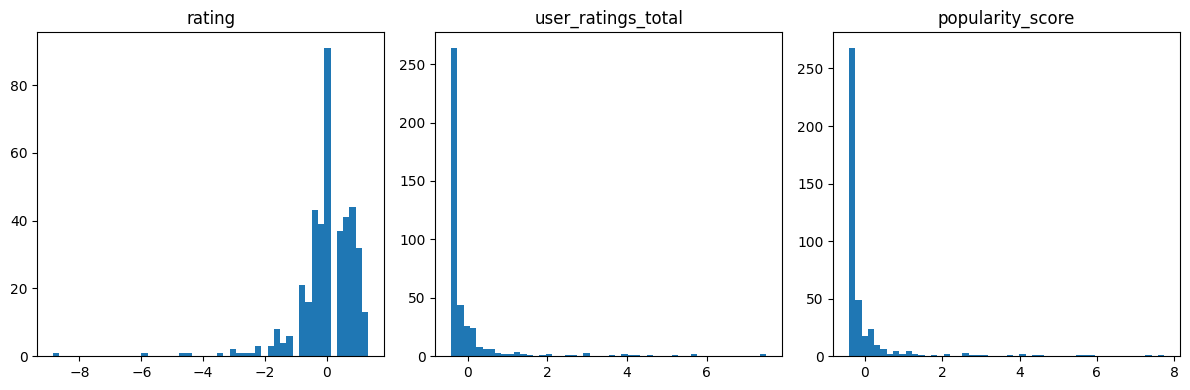

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'places' is your DataFrame
# If not, load it first:
# places = pd.read_csv('your_places_file.csv')

# Diagnostic steps
print("Shape of places DataFrame:", places.shape)
print("\nColumns in places DataFrame:", places.columns)
print("\nSample of places DataFrame:")
print(places.head())

# Check for null values
print("\nNull values in places DataFrame:")
print(places.isnull().sum())

# Check data types
print("\nData types of columns:")
print(places.dtypes)

# Check specific columns
print("\nUnique values in 'rating':", places['rating'].unique())
print("Unique values in 'user_ratings_total':", places['user_ratings_total'].unique())

# Check if all values are NaN
print("\nAll values NaN in 'rating':", places['rating'].isna().all())
print("All values NaN in 'user_ratings_total':", places['user_ratings_total'].isna().all())

# If there are non-NaN values, print some statistics
if not places['rating'].isna().all():
    print("\nStatistics for 'rating':")
    print(places['rating'].describe())

if not places['user_ratings_total'].isna().all():
    print("\nStatistics for 'user_ratings_total':")
    print(places['user_ratings_total'].describe())

# Handle missing values
places['rating'] = places['rating'].fillna(places['rating'].mean())
places['user_ratings_total'] = places['user_ratings_total'].fillna(places['user_ratings_total'].median())

# Create popularity score
places['popularity_score'] = places['rating'] * places['user_ratings_total']

# Check the resulting features
print("\nSample of features before scaling:")
print(places[['rating', 'user_ratings_total', 'popularity_score']].head())

# Prepare the features
features = ['rating', 'user_ratings_total', 'popularity_score']

# Check if we have any valid data to scale
if places[features].shape[0] > 0 and not places[features].isnull().all().all():
    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(places[features])

    # Create a DataFrame with the scaled features
    places_features = pd.DataFrame(scaled_features, columns=features, index=places.index)

    print("\nSample of scaled features:")
    print(places_features.head())

    print("\nShape of features matrix:", places_features.shape)

    # If you want to see the correlation between features
    print("\nCorrelation between features:")
    print(places_features.corr())

    # Visualize the distribution of the scaled features
    plt.figure(figsize=(12, 4))
    for i, feature in enumerate(features):
        plt.subplot(1, 3, i+1)
        plt.hist(places_features[feature], bins=50)
        plt.title(feature)
    plt.tight_layout()
    plt.show()

else:
    print("No valid data to scale. Please check your data.")
    # Create an empty DataFrame to avoid NameError
    places_features = pd.DataFrame()

* These places are not in our data set

In [43]:
# Save the updated places dataframe
#places.to_csv('updated_places_dataset.csv', index=False)

# Save the updated users dataframe
#users.to_csv('updated_users_dataset.csv', index=False)

#print("Updated dataframes have been saved to CSV files.")

# Data Preprocessing

* No problem in Users
* But need to check on null values in places

In [44]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm  # Import tqdm for progress logging

# Load the saved dataframes
#places = pd.read_csv('updated_places_dataset.csv')
#users = pd.read_csv('updated_users_dataset.csv')

# List of candidate activities
candidate_activities = [
    'amusement parks', 'animal encounters', 'archaeological sites', 'architecture photography', 
    'architecture tours', 'art classes', 'arts and culture', 'ayurvedic spa treatments', 
    'beach visits', 'beachfront dining', 'bird watching', 'boat safaris', 'botanical gardens', 
    'butterfly watching', 'camping', 'caving', 'city tours', 'craft workshops', 'cultural experiences', 
    'cultural festivals', 'cycling', 'elephant rides', 'fishing', 'golfing', 'hiking', 'historic sites', 
    'historic walks', 'historical monuments', 'history tours', 'horse shows', 'horseback riding', 
    'hot air ballooning', 'hot springs', 'kayaking', 'landscape photography', 'literary tours', 
    'local crafts', 'mountain biking', 'museum visits', 'outdoor adventures', 'paddleboarding', 
    'photography', 'planetarium visits', 'public art installations', 'river cruises', 'rock climbing', 
    'safaris', 'sailing', 'sailing lessons', 'scuba diving', 'sea cruises', 'sightseeing', 'snorkeling', 
    'spiritual retreats', 'surfing', 'tea tasting', 'temple pilgrimages', 'theater', 'themed parks', 
    'traditional ceremonies', 'turtle watching', 'village homestays', 'water parks', 'waterfalls', 
    'whale watching', 'wildlife viewing', 'yoga retreats', 'zip-lining'
]

# Function to extract activities from reviews using TF-IDF and cosine similarity
def extract_activities(reviews):
    # Combine the review with the candidate activities
    documents = [reviews] + candidate_activities

    # Convert the documents to TF-IDF vectors
    vectorizer = TfidfVectorizer().fit_transform(documents)
    vectors = vectorizer.toarray()

    # Calculate cosine similarity between the review and each candidate activity
    cosine_similarities = cosine_similarity(vectors[0:1], vectors[1:]).flatten()

    # Get the indices of the top 3 activities
    top_indices = cosine_similarities.argsort()[-3:][::-1]
    top_activities = [candidate_activities[i] for i in top_indices]

    return top_activities  # Return top 3 activities

# Apply the function to the latest_reviews column with a progress bar
tqdm.pandas(desc="Extracting activities for places")
places['extracted_activities'] = places['latest_reviews'].progress_apply(extract_activities)

print("Activity extraction completed for all places.")

# Save the updated places dataframe to a CSV file
places.to_csv('places_with_extracted_activities.csv', index=False)

print("Updated places dataframe saved to 'places_with_extracted_activities.csv'")


Extracting activities for places: 100%|██████████| 411/411 [00:01<00:00, 365.06it/s]

Activity extraction completed for all places.
Updated places dataframe saved to 'places_with_extracted_activities.csv'


In [49]:
type(users.at[0,'Bucket list destinations Sri Lanka'])

list

* *Try to Do recommendation*

In [50]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
import logging
from tqdm import tqdm

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the data
logging.info("Loading data...")
#places = pd.read_csv('places_with_extracted_activities.csv')
#users = pd.read_csv('updated_users_dataset.csv')

# Preprocess the data
logging.info("Preprocessing data...")

def preprocess_activities(activities):
    return [act.strip() for act in eval(activities)]

places['activities'] = places['extracted_activities']
users['preferred_activities'] = users['Preferred Activities'].apply(preprocess_activities)

# One-hot encoding for activities
all_activities = set()
for acts in places['activities'].values:
    all_activities.update(acts)
for acts in users['preferred_activities'].values:
    all_activities.update(acts)

activity_encoder = OneHotEncoder(sparse_output=False)
activity_encoder.fit([[act] for act in all_activities])

def encode_activities(activities):
    return activity_encoder.transform([[act] for act in activities]).sum(axis=0)

places['encoded_activities'] = places['activities'].apply(encode_activities)
users['encoded_preferred_activities'] = users['preferred_activities'].apply(encode_activities)

# One-hot encoding for places
place_encoder = OneHotEncoder(sparse_output=False)
place_encoder.fit(places[['name']])

# Normalize ratings and user_ratings_total
places['normalized_rating'] = (places['rating'] - places['rating'].min()) / (places['rating'].max() - places['rating'].min())
places['normalized_user_ratings_total'] = (places['user_ratings_total'] - places['user_ratings_total'].min()) / (places['user_ratings_total'].max() - places['user_ratings_total'].min())

# Calculate popularity score
places['popularity_score'] = places['normalized_rating'] * places['normalized_user_ratings_total']

# Prepare the data for the model
logging.info("Preparing data for the model...")

def prepare_data(users, places):
    X = []
    for _, user in tqdm(users.iterrows(), total=len(users), desc="Preparing data"):
        user_activities = user['encoded_preferred_activities']
        user_bucket_list = set(user['Updated_bucket_list'])
        for _, place in places.iterrows():
            place_activities = place['encoded_activities']
            place_encoded = place_encoder.transform([[place['name']]])[0]
            
            activity_overlap = np.sum(user_activities * place_activities) / (np.sum(user_activities) + np.sum(place_activities) + 1e-8)
            
            # Calculate extra points for bucket list and preferred activities overlap
            extra_points = 0
            if place['name'] in user_bucket_list:
                common_activities = set(user['preferred_activities']) & set(place['activities'])
                extra_points = len(common_activities) / len(user['preferred_activities'])
            
            X.append(np.concatenate([
                user_activities,
                place_activities,
                place_encoded,
                [place['normalized_rating']],
                [place['normalized_user_ratings_total']],
                [place['popularity_score']],
                [activity_overlap],
                [extra_points]
            ]))
    
    return np.array(X)

X = prepare_data(users, places)

# Build the model
logging.info("Building the model...")

n_activities = len(all_activities)
n_places = len(places)

input_activities = Input(shape=(n_activities * 2,))
input_place = Input(shape=(n_places,))
input_features = Input(shape=(5,))  # rating, user_ratings_total, popularity_score, activity_overlap, extra_points

x = Concatenate()([input_activities, input_place, input_features])
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input_activities, input_place, input_features], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
logging.info("Training the model...")
history = model.fit(
    [X[:, :n_activities*2], X[:, n_activities*2:n_activities*2+n_places], X[:, -5:]],
    X[:, -1],  # Use the extra_points as the target
    epochs=10,
    batch_size=32,
    verbose=1
)

# Function to make recommendations
def recommend_places(user, places, model, top_n=5):
    user_activities = user['encoded_preferred_activities']
    user_bucket_list = set(user['Updated_bucket_list'])
    place_data = []
    for _, place in places.iterrows():
        place_activities = place['encoded_activities']
        place_encoded = place_encoder.transform([[place['name']]])[0]
        
        activity_overlap = np.sum(user_activities * place_activities) / (np.sum(user_activities) + np.sum(place_activities) + 1e-8)
        
        extra_points = 0
        if place['name'] in user_bucket_list:
            common_activities = set(user['preferred_activities']) & set(place['activities'])
            extra_points = len(common_activities) / len(user['preferred_activities'])
        
        place_data.append(np.concatenate([
            user_activities,
            place_activities,
            place_encoded,
            [place['normalized_rating']],
            [place['normalized_user_ratings_total']],
            [place['popularity_score']],
            [activity_overlap],
            [extra_points]
        ]))
    
    place_data = np.array(place_data)
    predictions = model.predict([
        place_data[:, :n_activities*2],
        place_data[:, n_activities*2:n_activities*2+n_places],
        place_data[:, -5:]
    ]).flatten()
    
    top_indices = np.argsort(predictions)[-top_n:][::-1]
    return [(places.iloc[i]['name'], predictions[i]) for i in top_indices]

# Make recommendations for all users
logging.info("Making recommendations...")
all_recommendations = []
for _, user in tqdm(users.iterrows(), total=len(users), desc="Making recommendations"):
    user_recommendations = recommend_places(user, places, model)
    all_recommendations.append({
        'User ID': user['User ID'],
        'Name': user['Name'],
        'Email': user['Email'],
        'Recommended Places': [place for place, _ in user_recommendations]
    })

# Save recommendations
recommendations_df = pd.DataFrame(all_recommendations)
recommendations_df.to_csv('user_place_recommendations_tf.csv', index=False)
logging.info("Recommendations saved to 'user_place_recommendations_tf.csv'")

logging.info("Recommendation process completed.")






2024-09-13 20:03:27,827 - INFO - Loading data...
2024-09-13 20:03:27,827 - INFO - Preprocessing data...
2024-09-13 20:03:33,255 - INFO - Preparing data for the model...
Preparing data:   0%|          | 0/10000 [00:00<?, ?it/s]C:\Users\SAHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\SAHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\SAHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\SAHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names

KeyboardInterrupt: 